# Лабораторная работа № 2. Алгоритмизация обучения однослойного перцептрона

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# сигмоидная логистическая функция
def sigmoid(s):
    return 1/(np.exp(-s)+1)

def norm(s, s_min, s_max):
    return (s-s_min)/(s_max-s_min)

def denorm(sf, s_min, sf_max):
    return s_min + s*(s_max - s_min)

def mse(A, B):
  return (np.square(A - B)).mean(axis=None)

In [ ]:
x =      np.random.randint(-10, 11, size= (50, 2))
x =      np.column_stack((np.ones(50),x))
x_test = np.random.randint(-10, 11, size= (25, 2))
x_test = np.column_stack((np.ones(25),x_test))
y =      np.column_stack((x[:,1]+x[:,2],
                          x[:,2]+2*x[:,1],
                          2*x[:,2]))

y_test = np.column_stack((x_test[:,1]+x_test[:,2],
                          x_test[:,2]+2*x_test[:,1],
                          2*x_test[:,2]))

In [ ]:
a_1 = -20
b_1 = 20
a_2 = 30
b_2 = -30
a_3 = -20
b_3 =20

In [ ]:
x_norm = np.column_stack((x[:,0], norm(x[:,1:], -10, 10)))
x_test_norm = np.column_stack((x_test[:,0],norm(x_test[:,1:], -10, 10)))
y_norm = np.column_stack((norm(y[:,0], a_1, b_1),
          norm(y[:,1], a_2, b_2), norm(y[:,2], a_3, b_3)))
y_test_norm = np.column_stack((norm(y_test[:,0], a_1, b_1),
          norm(y_test[:,1], a_2, b_2), norm(y_test[:,2], a_3, b_3)))

In [ ]:
weights = np.random.uniform(low=-1/2, high=1/2, size=(3,3))
copy = weights.copy()
mse(sigmoid(np.dot(x_norm, weights)), y_norm)

0.07174482887059971

In [ ]:
epochs = []
for v in np.linspace(0.001, 0.1, 10):
  epoch = 0
  errs = []
  weights = copy.copy()
  while True:
    for x_i, y_i in zip(x_norm, y_norm):
      err = y_i - sigmoid(np.dot(x_i, weights))
      for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
          weights[i,j] += v*err[j]*x_i[i]
    errs.append(mse(sigmoid(np.dot(x_norm, weights)), y_norm))
    epoch += 1
    if errs[-1] <= 0.01:
      break
  epochs.append(epoch)

In [ ]:
epochs

[1291, 108, 56, 38, 29, 23, 20, 17, 15, 13]

Text(0.5, 1.0, 'v=0.1')

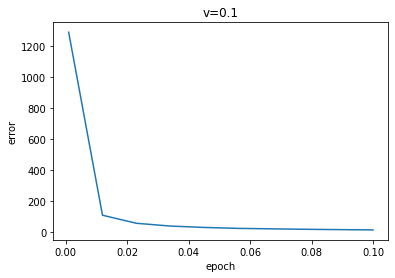

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0.001, 0.1, 10), epochs)
ax.set_xlabel('epoch')
ax.set_ylabel('error')
ax.set_title('v=0.1')

In [ ]:
weights1 = weights.copy()

In [ ]:
weights = copy.copy()
errs = []
for e in range(13):
  v = (50-e)/50
  for x_i, y_i in zip(x_norm, y_norm):
    err = y_i - sigmoid(np.dot(x_i, weights))
    for i in range(weights.shape[0]):
      for j in range(weights.shape[1]):
        weights[i,j] += v*err[j]*x_i[i]
  errs.append(mse(sigmoid(np.dot(x_norm, weights)), y_norm))

Text(0.5, 1.0, 'v=0.01')

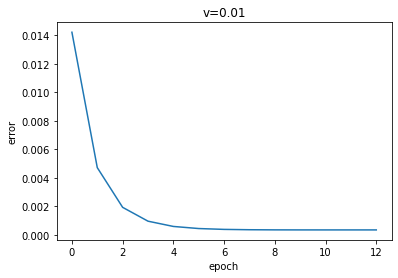

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(13), errs)
ax.set_xlabel('epoch')
ax.set_ylabel('error')
ax.set_title('v=0.01')

In [ ]:
display(mse(sigmoid(np.dot(x_norm, weights)), y_norm))
display(mse(sigmoid(np.dot(x_test_norm, weights)), y_test_norm))

0.0003478062812308577

0.0006075342092325518